# Testing with XGBoost

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


import sys; sys.path.append("../../")
from modules.utils import load_yaml
from modules.evaluation import pretty_classification_report, plot_confusion_matrix

# Read Data

Note: in the submission, we cannot use `test.csv`. This has no labels and it is for submission only. So we need to use validation data as the test

--> This should be OK since the data size seems large enough

In [2]:
TRAIN_CONFIG_PATH = '../../config/train_config.yaml'
DATA_PATH = '../../data/01_split/'

config = load_yaml(TRAIN_CONFIG_PATH)
LABEL_ENCODING = config['LABEL_ENCODING']

train_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'valid.csv'))

../../config/train_config.yaml


## Split into train and test

As said, we will use val and test as the same 

In [3]:
train_X, train_y = train_df.loc[:,train_df.columns!='leaktype'], train_df['leaktype']
valid_X, valid_y = valid_df.loc[:,train_df.columns!='leaktype'], valid_df['leaktype']

train_y = train_y.replace(LABEL_ENCODING)
valid_y = valid_y.replace(LABEL_ENCODING)

# Same testing and validation
test_X, test_y = valid_X, valid_y

# Train Model

In [4]:
# XG

import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

# Prediction

In [5]:
pred_y = xgb.predict(test_X)

# Metrics evaluation

We need to get a few metrics right

In [6]:
encoding_to_label = {v: k for k, v in LABEL_ENCODING.items()}
labels = [key for key in LABEL_ENCODING.keys()]


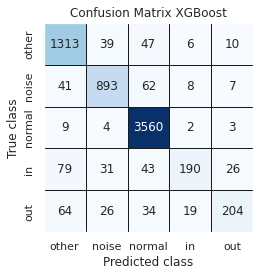

In [7]:
model = 'XGBoost'
plot_confusion_matrix(test_y, pred_y, labels,  f'Confusion Matrix {model}')

In [8]:
pretty_classification_report(test_y, pred_y)

,precision,recall,f1-score,support
0,0.927915,0.871846,0.899007,1506
1,0.883284,0.899295,0.891218,993
2,0.994969,0.950347,0.972146,3746
3,0.514905,0.844444,0.639731,225
4,0.587896,0.816000,0.683417,250
accuracy,0.916667,0.916667,0.916667,0
macro avg,0.781794,0.876386,0.817104,6720
weighted avg,0.932221,0.916667,0.921925,6720


In [10]:
from sklearn.metrics import f1_score

f1 = f1_score(test_y, pred_y, average='macro')
print('F1 score :', f1)

F1 score : 0.8171037694903245
